In [7]:
f_picud = lambda v, lv, a: (v ** 2) / (2 * a) + v - (lv ** 2) / (2 * a) + 5
f_ttc = lambda v, lv, ttc_star: ttc_star * (v - lv)
f_drac = lambda v, lv, a: ((v - lv) ** 2) / a

In [10]:
print(f_picud(25, 20, 5))
print(f_ttc(25, 20, 2))
print(f_drac(25, 20, 5))

52.5
10
5.0


In [4]:
import numpy as np

F_i = lambda W, theta: W * np.sin(theta)
F_f = lambda W, theta, f_mu: f_mu * W * np.cos(np.arctan(theta))
F_w = lambda rho, C_D, A, v: 0.5 * rho * C_D * A * (v ** 2)
W_ = 1520 * 10  # 整车重量N
theta_ = 0  # 道路坡度tan(theta)
f_mu_ = 0.01  # 滚动摩擦系数
rho_ = 1.29  # 空气密度(kg/m^3)
C_D_ = 0.3  # 空气阻力系数
A_ = 1.8  # 迎风面积(m^2)
v_ = 25  # 车辆速度(m/s)
F_tr1_tr2 = F_i(W_, theta_) + F_f(W_, theta_, f_mu_) + F_w(rho_, C_D_, A_, v_)
F_tr1_tr2 / (W_ / 10)

0.2432154605263158

In [5]:
F_D = lambda sigma, v, f_z, f_s: 0.92 * np.power(0.1304, sigma) + 0.002 * np.power(np.e, sigma) * (64 - v) - 0.0426 * np.sqrt(f_z / f_s)
F_C = lambda sigma, v: - 0.2 * sigma + 1.5 - 0.002 * (40 - v)
F_B = lambda sigma, v, f_c: 1 / (0.1532 * np.power(sigma, 3) - 0.47801 * np.power(sigma, 2) + 0.256 * sigma + 0.1693 + 0.105 * np.log(64 / v)) * np.tan(np.pi / (2 * f_c))

F_mu_xp = lambda t, D, C, B, eta, phi, ka, s_0: D * np.sin(C * np.arctan(B * (eta * np.cos(phi * t + ka) + s_0)))
F_phi = lambda W, theta, mu_xpf, mu_xpr, l_1, l_2, f_mu, h, L: (W * np.cos(theta) * (mu_xpf * (l_2 + f_mu * h) + mu_xpr * (l_1 - f_mu * h))) / (L - h * (mu_xpf - mu_xpr))

F_zf = lambda L, W, l_2, theta, h, rho, C_D, A, v: 1 / L * (W * l_2 * np.cos(theta) + h * (- 0.5 * rho * C_D * A * np.power(v, 2) - W * np.sin(theta)))
F_zr = lambda L, W, l_1, theta, h, rho, C_D, A, v: 1 / L * (W * l_1 * np.cos(theta) - h * (- 0.5 * rho * C_D * A * np.power(v, 2) - W * np.sin(theta)))

t_ = 0.1
sigma_ = 0.  # 路面特征因子
L_ = 2.705  # 轴距
l_1_ = 1.082  # 质心至前轴距离
l_2_ = 1.623  # 质心至后轴距离
h_ = 0.523  # 质心高度
eta_ = 0.025  # 滑移率波动振幅
phi_ = 60 * 2 * np.pi  # 波动频率rad/s
ka_ = 0.5  # 前后轴抱死时间间隔s
f_s_ = 2060  # 轮胎标定荷载N
s_0_ = 0.175

f_c_ = F_C(sigma_, v_)
f_b_ = F_B(sigma_, v_, f_c_)
f_zf_ = F_zf(L_, W_, l_2_, np.arctan(theta_), h_, rho_, C_D_, A_, v_)
f_zr_ = F_zr(L_, W_, l_1_, np.arctan(theta_), h_, rho_, C_D_, A_, v_)
f_D_f = F_D(sigma_, v_, f_zf_, f_s_)
f_D_r = F_D(sigma_, v_, f_zr_, f_s_)
f_mu_xpf_ = F_mu_xp(t_, f_D_f, f_c_, f_b_, eta_, phi_, ka_, s_0_)
f_mu_xrf_ = F_mu_xp(t_, f_D_r, f_c_, f_b_, eta_, phi_, ka_, s_0_)

f_phi = F_phi(W_, np.arctan(theta_), f_mu_xpf_, f_mu_xrf_, l_1_, l_2_, f_mu_, h_, L_)

F_tr4 = F_tr1_tr2 + f_phi
F_tr4 / (W_ / 10)

9.173630118748022

In [6]:
def get_a_roll(speed):
    F_tr1_tr2 = F_i(W_, theta_) + F_f(W_, theta_, f_mu_) + F_w(rho_, C_D_, A_, speed)
    return F_tr1_tr2 / (W_ / 10)

def get_a_abs(sigma, speed):
    F_tr1_tr2 = get_a_roll(speed) * (W_ / 10)
    f_c_ = F_C(sigma, speed)
    f_b_ = F_B(sigma, speed, f_c_)
    f_zf_ = F_zf(L_, W_, l_2_, np.arctan(theta_), h_, rho_, C_D_, A_, speed)
    f_zr_ = F_zr(L_, W_, l_1_, np.arctan(theta_), h_, rho_, C_D_, A_, speed)
    f_D_f = F_D(sigma, speed, f_zf_, f_s_)
    f_D_r = F_D(sigma, speed, f_zr_, f_s_)
    f_mu_xpf_ = F_mu_xp(t_, f_D_f, f_c_, f_b_, eta_, phi_, ka_, s_0_)
    f_mu_xrf_ = F_mu_xp(t_, f_D_r, f_c_, f_b_, eta_, phi_, ka_, s_0_)

    f_phi = F_phi(W_, np.arctan(theta_), f_mu_xpf_, f_mu_xrf_, l_1_, l_2_, f_mu_, h_, L_)
    F_tr4 = F_tr1_tr2 + f_phi
    return F_tr4 / (W_ / 10)

In [7]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')

In [8]:

_v = np.arange(5, 30, 1)
_sigma = np.arange(0, 1.2, 0.1)

a_abs_list = []
a_roll_list = get_a_roll(_v)
for sig in _sigma:
    a_abs_list.append(get_a_abs(sig, _v))

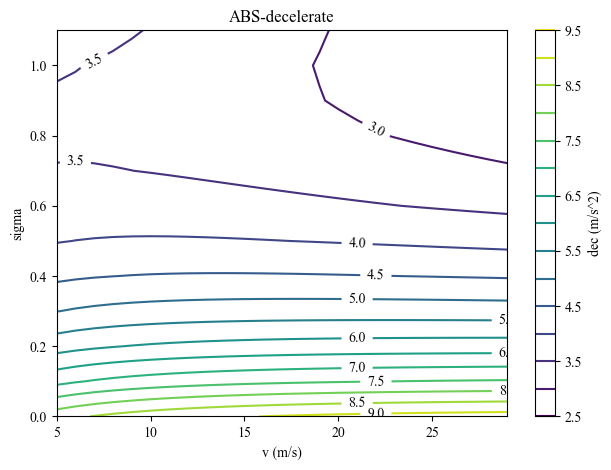

In [9]:
from matplotlib.contour import QuadContourSet
from matplotlib.colorbar import Colorbar

# plt.contourf(v, sigma, a_abs_list)
c: QuadContourSet = plt.contour(_v, _sigma, a_abs_list, 15)
cb: Colorbar = plt.colorbar(c)
cb.set_label("dec (m/s^2)")
plt.clabel(c, fontsize=10, colors='k')
plt.xlabel("v (m/s)")
plt.ylabel("sigma")
plt.title("ABS-decelerate")
plt.tight_layout()

plt.savefig("./fig/ABS下的制动减速度")

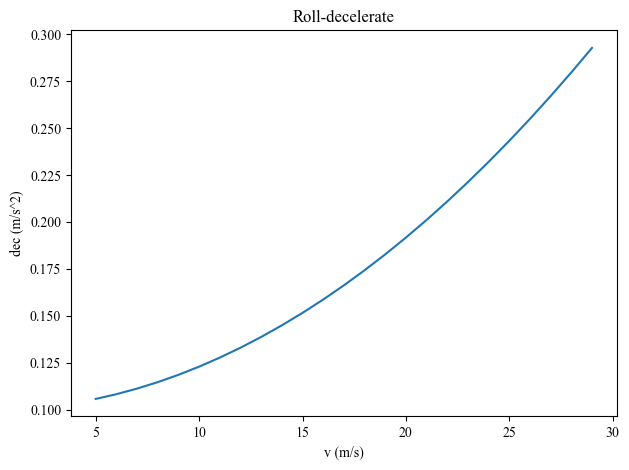

In [10]:
plt.plot(_v, a_roll_list)
plt.xlabel("v (m/s)")
plt.ylabel("dec (m/s^2)")
plt.title("Roll-decelerate")
plt.tight_layout()

plt.savefig("./fig/纯滚动下的减速度")

In [11]:
def get_dist(v_, sigma_, a_r1, reaction_time, brake_coordination_time, t_rp_r2, plot=False):
    a_r2 = get_a_roll(v_)
    a_r4 = get_a_abs(sigma_, v_)
    tau = (a_r4 - a_r2) / t_rp_r2

    time_1 = np.arange(0, reaction_time + 1e-5, 0.01)
    time_2 = np.arange(0, brake_coordination_time + 1e-5, 0.01)
    time_3 = np.arange(0, t_rp_r2 + 1e-5, 0.01)

    func_x_1 = lambda t: v_ * t + 0.5 * a_r1 * (t ** 2)
    func_v_1 = lambda t: v_ + a_r1 * t
    func_a_1 = lambda t: - a_r1
    pos_1 = v_ * reaction_time + 0.5 * a_r1 * (reaction_time ** 2)
    speed_1 = v_ + a_r1 * reaction_time

    func_x_2 = lambda t: pos_1 + speed_1 * t - 0.5 * a_r2 * (t ** 2)
    func_v_2 = lambda t: speed_1 - a_r2 * t
    func_a_2 = lambda t: a_r2
    pos_2 = func_x_2(brake_coordination_time)
    speed_2 = func_v_2(brake_coordination_time)

    if a_r2 < abs(a_r1) and a_r1 < 0:
        a_r2 = - a_r1
    func_a_3 = lambda t: a_r2 + (a_r4 - a_r2) / t_rp_r2 * t
    func_v_3 = lambda t: speed_2 - (a_r2 * t + 0.5 * (a_r4 - a_r2) / t_rp_r2 * (t ** 2))
    func_x_3 = lambda t: pos_2 + speed_2 * t - (0.5 * a_r2 * (t ** 2) + 0.5 / 3 * (a_r4 - a_r2) / t_rp_r2 * (t ** 3))
    pos_3 = func_x_3(t_rp_r2)
    speed_3 = func_v_3(t_rp_r2)

    func_v_4 = lambda t: speed_3 - a_r4 * t
    time_4 = np.arange(0, speed_3 / a_r4, 0.01)
    func_x_4 = lambda t: pos_3 + speed_3 * t - 0.5 * a_r4 * (t ** 2)
    func_a_4 = lambda t: a_r4

    if plot:
        fig, ax = plt.subplots(1, 3, figsize=(10, 3), layout="tight")
        fig: plt.Figure = fig
        ax: list[plt.Axes] = ax

        ax[0].plot(time_1, func_x_1(time_1))
        ax[0].plot(time_2 + reaction_time, func_x_2(time_2))
        ax[0].plot(time_3 + reaction_time + brake_coordination_time, func_x_3(time_3))
        ax[0].plot(time_4 + reaction_time + brake_coordination_time + t_rp_r2, func_x_4(time_4))
        ax[0].set_xlabel("time (s)")
        ax[0].set_ylabel("pos (m)")

        ax[1].plot(time_1, func_v_1(time_1))
        ax[1].plot(time_2 + reaction_time, func_v_2(time_2))
        ax[1].plot(time_3 + reaction_time + brake_coordination_time, func_v_3(time_3))
        ax[1].plot(time_4 + reaction_time + brake_coordination_time + t_rp_r2, func_v_4(time_4))
        ax[1].set_xlabel("time (s)")
        ax[1].set_ylabel("speed (m/s)")

        ax[2].plot(time_1, [- func_a_1(time_1)] * len(time_1))
        ax[2].plot(time_2 + reaction_time, [- func_a_2(time_2)] * len(time_2))
        ax[2].plot(time_3 + reaction_time + brake_coordination_time, - func_a_3(time_3))
        ax[2].plot(time_4 + reaction_time + brake_coordination_time + t_rp_r2, [- func_a_4(time_4)] * len(time_4))
        ax[2].set_xlabel("time (s)")
        ax[2].set_ylabel("acc (m/s^2)")

    # gipps_tau = 2 / 3
    # time_1 = np.arange(0, gipps_tau, 0.01)
    # gipps_func_a_1 = lambda t: a_r1
    # gipps_func_v_1 = lambda t: v_ + a_r1 * t
    # gipps_func_x_1 = lambda t: v_ * t + 0.5 * a_r1 * (t ** 2)
    # gipps_pos_1 = gipps_func_x_1(gipps_tau)
    # gipps_speeed_1 = gipps_func_v_1(gipps_tau)

    # speed_1 = v_ + a_r1 * 2 / 3
    # time_2 = np.arange(0, speed_2)
    # ax[0].plot()

    # fig.savefig("./fig/初始减速")
    return func_x_4(speed_3 / a_r4), reaction_time + brake_coordination_time + t_rp_r2 + speed_3 / a_r4

4.999999999999998

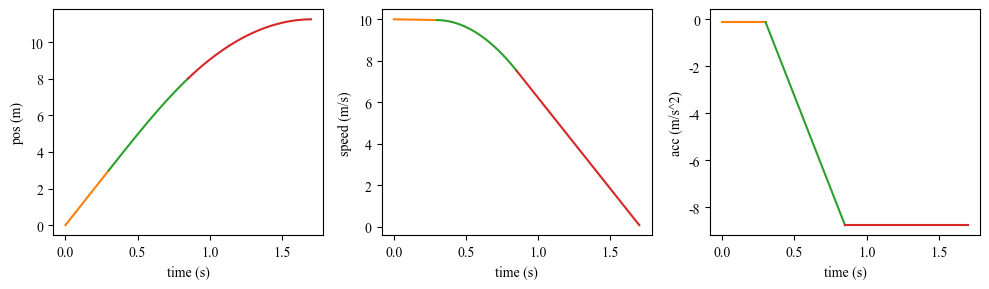

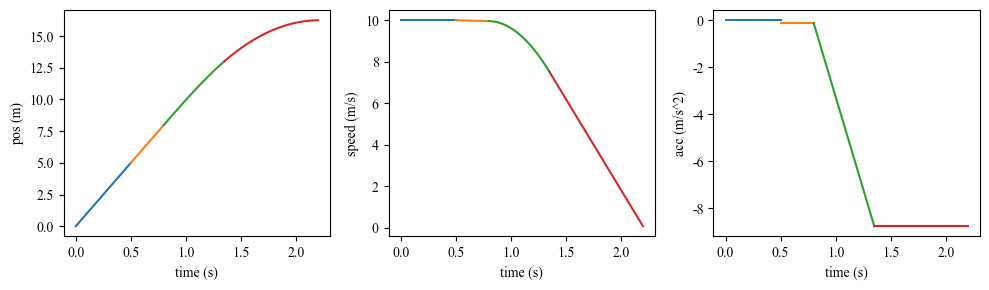

In [12]:
def get_warning_dist(acc, plot=False):
    leader_dist = get_dist(
        v_ = 10,
        sigma_ = 0.,  # 路面特征因子
        a_r1 = 0,
        reaction_time = 0,
        brake_coordination_time = 0.3,  # 0.3
        t_rp_r2 = 0.55,  # 压力增长时间
        plot=plot
    )
    follower_dist = get_dist(
        v_ = 10,
        sigma_ = 0.,  # 路面特征因子
        a_r1 = acc,
        reaction_time = 0.5,
        brake_coordination_time = 0.3,  # 0.3
        t_rp_r2 = 0.55,  # 压力增长时间
        plot=plot
    )
    return follower_dist[0] - leader_dist[0]

get_warning_dist(0, True)

In [13]:
def CFS(v, l_v, gap, acc, tau_, dec_comfort, dec_max):
    v_2 = v + acc * tau_
    if v_2 <= l_v:
        d_safe = d_unsafe = ((v - l_v) ** 2) / (2 * acc)
    else:
        d_new = ((v_2 + v) / 2 - l_v) * tau_
        d_safe = d_new + ((v_2 - l_v) ** 2) / (2 * dec_comfort)
        d_unsafe = d_new + ((v_2 - l_v) ** 2) / (2 * dec_max)
    if gap <= d_unsafe:
        cfs = 1
    elif gap >= d_safe:
        cfs = 0
    else:
        cfs = (gap - d_safe) / (d_unsafe - d_safe)
    return cfs

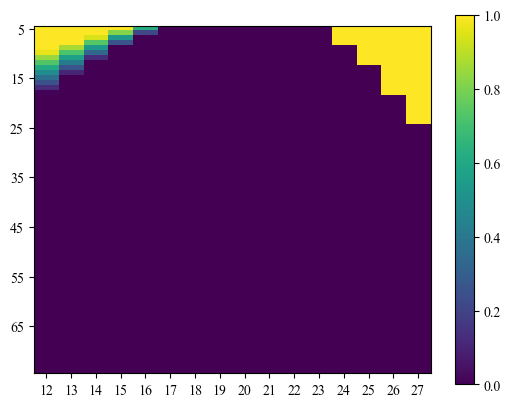

In [14]:
import numpy as np
gaps = np.arange(5, 75, 1)
v = 20
l_vs = np.arange(12, 28, 1)
result = []
for gap in gaps:
    temp = []
    for l_v in l_vs:
        temp.append(CFS(v, l_v, gap, 1, 2 / 3, 3, 9))
    result.append(temp)
result = np.array(result)
c = plt.imshow(result, aspect=0.2)
plt.xticks(range(len(l_vs)), l_vs)
plt.yticks(np.arange(0, 70, 10), np.arange(5, 75, 10))
plt.colorbar(c, cmap=plt)

In [16]:
def PFS(v, l_v, gap, tau_, dec_comfort, dec_max):
    d_safe = v * tau_ + (v ** 2) / (2 * dec_comfort) - (l_v ** 2) / (2 * dec_max)
    d_unsafe = v * tau_ + (v ** 2) / (2 * dec_max) - (l_v ** 2) / (2 * dec_max)
    if gap <= d_unsafe:
        return 1
    if gap >= d_safe:
        return 0
    return (gap - d_safe) / (d_unsafe - d_safe)

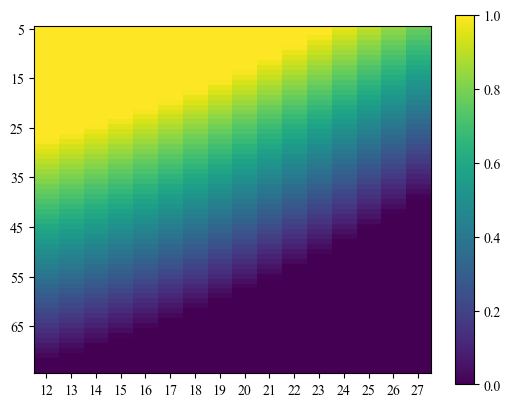

In [17]:
import numpy as np
gaps = np.arange(5, 75, 1)
v = 20
l_vs = np.arange(12, 28, 1)
result = []
for gap in gaps:
    temp = []
    for l_v in l_vs:
        temp.append(PFS(v, l_v, gap, 2 / 3, 3, 9))
    result.append(temp)
result = np.array(result)
c = plt.imshow(result, aspect=0.2)
plt.xticks(range(len(l_vs)), l_vs)
plt.yticks(np.arange(0, 70, 10), np.arange(5, 75, 10))
plt.colorbar(c, cmap=plt)

In [18]:
def PFS_improve(v, l_v, gap, acc, tau_, dec_comfort, dec_max):
    d_safe = v * tau_ + (v ** 2) / (2 * dec_comfort) - (l_v ** 2) / (2 * dec_max)
    d_unsafe = get_warning_dist(- acc)
    if gap <= d_unsafe:
        return 1
    if gap >= d_safe:
        return 0
    return (gap - d_safe) / (d_unsafe - d_safe)

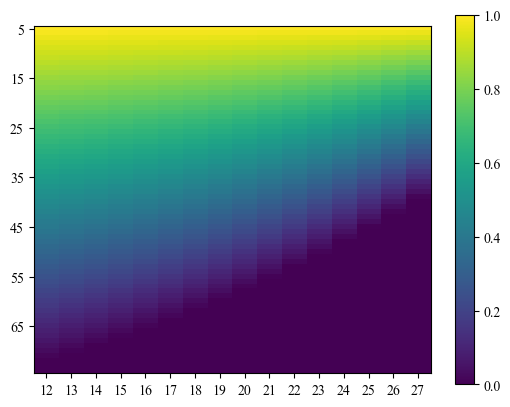

In [19]:
import numpy as np
gaps = np.arange(5, 75, 1)
v = 20
l_vs = np.arange(12, 28, 1)
result = []
for gap in gaps:
    temp = []
    for l_v in l_vs:
        temp.append(PFS_improve(v, l_v, gap, 0, 2 / 3, 3, 9))
    result.append(temp)
result = np.array(result)
c = plt.imshow(result, aspect=0.2)
plt.xticks(range(len(l_vs)), l_vs)
plt.yticks(np.arange(0, 70, 10), np.arange(5, 75, 10))
plt.colorbar(c, cmap=plt)